In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/aiml/knn.csv")

In [4]:
df.head()

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [5]:
x=df.iloc[:,0:2].values #prefers x as 2D and y ad 1D
y=df.iloc[:,2].values   #1st argument rows 2nd argument coulmns whether 1D or 2D(:)

In [6]:
x

array([[ 51, 167],
       [ 66, 177],
       [ 75, 169],
       [ 69, 176],
       [ 50, 173],
       [ 82, 170],
       [ 65, 172],
       [ 58, 180],
       [ 68, 162],
       [ 63, 165],
       [ 52, 174],
       [ 58, 169],
       [ 78, 162],
       [ 65, 168],
       [ 62, 183],
       [ 72, 180],
       [ 80, 180],
       [ 60, 178],
       [ 57, 173],
       [ 73, 164],
       [ 53, 170],
       [ 74, 182],
       [ 72, 175],
       [ 53, 163],
       [ 55, 180]])

In [7]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [8]:
k=5  #square root of total number of record?rows

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [10]:
model=KNC(n_neighbors=k,metric="euclidean")

In [11]:
model.fit(x,y)

KNeighborsClassifier(metric='euclidean')

In [12]:
pred=[[55.2,167]]

In [13]:
model.predict(pred)

array(['Normal'], dtype=object)

In [14]:
pred1=[[74.5,172]]

In [15]:
model.predict(pred1)

array(['Overweight'], dtype=object)

In [16]:
pred2=[[55,157.5]]

In [17]:
model.predict(pred2)

array(['Normal'], dtype=object)

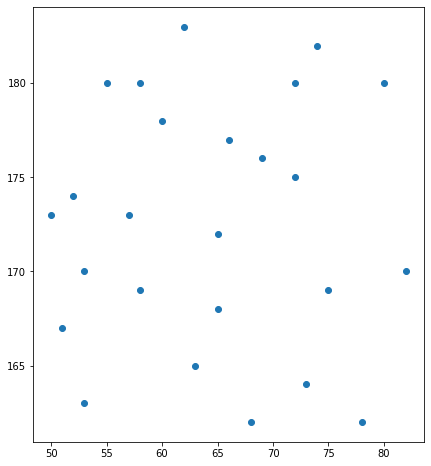

In [18]:
plt.figure(figsize=(7,8))
plt.scatter(df['Weight(x2)'],df['Height(y2)'])

In [19]:
df[['Class']]

,Class
0,Underweight
1,Normal
2,Overweight
3,Normal
4,Underweight
5,Overweight
6,Normal
7,Underweight
8,Overweight
9,Normal


In [20]:
df1=df[df['Class']=='Normal']
df1

,Weight(x2),Height(y2),Class
1,66,177,Normal
3,69,176,Normal
6,65,172,Normal
9,63,165,Normal
11,58,169,Normal
13,65,168,Normal
15,72,180,Normal
18,57,173,Normal
21,74,182,Normal
23,53,163,Normal


In [21]:
df2=df[df['Class']=="Underweight"]
df2

,Weight(x2),Height(y2),Class
0,51,167,Underweight
4,50,173,Underweight
7,58,180,Underweight
10,52,174,Underweight
14,62,183,Underweight
17,60,178,Underweight
20,53,170,Underweight
24,55,180,Underweight


In [22]:
df3=df[df['Class']=="Overweight"]
df3

,Weight(x2),Height(y2),Class
2,75,169,Overweight
5,82,170,Overweight
8,68,162,Overweight
12,78,162,Overweight
16,80,180,Overweight
19,73,164,Overweight
22,72,175,Overweight


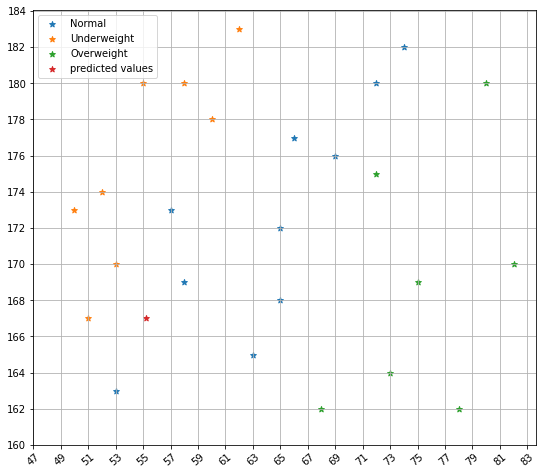

In [23]:
plt.figure(figsize=(9,8))
plt.scatter(df1['Weight(x2)'],df1['Height(y2)'],label="Normal",marker='*')
plt.scatter(df2['Weight(x2)'],df2['Height(y2)'],label="Underweight",marker='*')
plt.scatter(df3['Weight(x2)'],df3['Height(y2)'],label="Overweight",marker='*')
plt.scatter(pred[0][0],pred[0][1],label='predicted values',marker='*')
plt.grid()
plt.xticks(np.arange(47,85,2),rotation=40)
plt.yticks(np.arange(160,185,2))
plt.legend(loc='upper left')
plt.show()

In [24]:
#accuracy

In [25]:
model.score(x,y)

0.92

In [26]:
y_p=model.predict(x)

In [27]:
y_p

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [28]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [30]:
confusion_matrix(y_p,y)


array([[9, 1, 0],
       [0, 6, 0],
       [1, 0, 8]])

In [31]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [32]:
accuracy_score(y_p,y)

0.92